In [1]:
import pandas as pd
import seaborn as sns; sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
import os
from IPython import display
from PIL import Image

### Metrics report

In [2]:
df = pd.DataFrame()

In [3]:
data_list = os.listdir("results/regular/")

In [4]:
for data in data_list:
    if ".csv" in data:
        new_df = pd.read_csv("results/regular/" + data)
        df = pd.concat([df, new_df], axis = 0).reset_index(drop=True)

In [5]:
#vqc_list = os.listdir("")
vqc_df = pd.read_csv("vqc_results/train_process/su2_cobyla_2.csv")
vqc_df["model"] = "VQC"
df = pd.concat([df, vqc_df], axis = 0).reset_index(drop=True)

In [6]:
df = df.fillna(0)
df

,f1_test,f1_train,prec_train,prec_test,recall_train,recall_test,model,elapsed,tau,C,feature_map_type,optimizer,objective_vals,Ansatz,Training time,Model,Max Iter,reps
0,0.968254,0.986867,0.974074,0.938462,1.000000,1.000000,QSVC,41142.298698,0.0,0.0,0,0,0,0,0.000000,0,0.0,0.0
1,0.940874,0.965644,0.935791,0.888350,0.997465,1.000000,Naive Bayes,0.005849,0.0,0.0,0,0,0,0,0.000000,0,0.0,0.0
2,0.970822,0.998734,0.997472,0.943299,1.000000,1.000000,Random Forest,0.112706,0.0,0.0,0,0,0,0,0.000000,0,0.0,0.0
3,0.965699,0.986867,0.974074,0.933673,1.000000,1.000000,SVC,0.027467,0.0,0.0,0,0,0,0,0.000000,0,0.0,0.0
4,0.981233,0.996207,0.993695,0.963158,0.998733,1.000000,Decision Tree,0.007999,0.0,0.0,0,0,0,0,0.000000,0,0.0,0.0
5,0.965699,0.986233,0.974042,0.933673,0.998733,1.000000,Logistic Regression,0.015601,0.0,0.0,0,0,0,0,0.000000,0,0.0,0.0
6,0.962162,0.976627,0.973552,0.951872,0.979721,0.972678,Pegasos QSVC,70.398480,300.0,750.0,0,0,0,0,0.000000,0,0.0,0.0
7,0.826531,0.866032,0.867684,0.775120,0.864385,0.885246,VQC,4354.364534,0.0,0.0,Pauli,cobyla,"[1.0241258144675252, 1.1120859174185838, 1.058...",su2,4354.364534,VQC,250.0,2.0


In [7]:
df["data"] = "room"

In [8]:
df.to_csv("../data_for_paper/performance_room.csv", index=False)

In [9]:
f1 = df[["model", "f1_train", "f1_test"]]
f1

,model,f1_train,f1_test
0,QSVC,0.986867,0.968254
1,Naive Bayes,0.965644,0.940874
2,Random Forest,0.998734,0.970822
3,SVC,0.986867,0.965699
4,Decision Tree,0.996207,0.981233
5,Logistic Regression,0.986233,0.965699
6,Pegasos QSVC,0.976627,0.962162
7,VQC,0.866032,0.826531


In [10]:
prec = df[["model", "prec_train", "prec_test"]]
prec

,model,prec_train,prec_test
0,QSVC,0.974074,0.938462
1,Naive Bayes,0.935791,0.888350
2,Random Forest,0.997472,0.943299
3,SVC,0.974074,0.933673
4,Decision Tree,0.993695,0.963158
5,Logistic Regression,0.974042,0.933673
6,Pegasos QSVC,0.973552,0.951872
7,VQC,0.867684,0.775120


In [11]:
recall = df[["model", "recall_train", "recall_test"]]
recall

,model,recall_train,recall_test
0,QSVC,1.000000,1.000000
1,Naive Bayes,0.997465,1.000000
2,Random Forest,1.000000,1.000000
3,SVC,1.000000,1.000000
4,Decision Tree,0.998733,1.000000
5,Logistic Regression,0.998733,1.000000
6,Pegasos QSVC,0.979721,0.972678
7,VQC,0.864385,0.885246


### Confusion Matrix Report

In [12]:
conf_list = os.listdir("conf")
for conf in conf_list:
    if "png" not in conf:
        conf_list.remove(conf)
conf_list

['nb.png',
 'lr.png',
 '.ipynb_checkpoints',
 'decision_tree.png',
 'rf.png',
 'qsvc_resized.png',
 'svc.png',
 'qsvc.png']

In [13]:
for i in range(len(conf_list)):
    if ".png" in conf_list[i]:
        conf_list[i] = "conf/" + conf_list[i]
conf_list

['conf/nb.png',
 'conf/lr.png',
 '.ipynb_checkpoints',
 'conf/decision_tree.png',
 'conf/rf.png',
 'conf/qsvc_resized.png',
 'conf/svc.png',
 'conf/qsvc.png']

In [14]:
conf_list.append("conf/pegasos_conf_test/300_750.png")
conf_list.append("vqc_conf/vqc_best.png")

In [15]:
conf_list.remove(".ipynb_checkpoints")
conf_list

['conf/nb.png',
 'conf/lr.png',
 'conf/decision_tree.png',
 'conf/rf.png',
 'conf/qsvc_resized.png',
 'conf/svc.png',
 'conf/qsvc.png',
 'conf/pegasos_conf_test/300_750.png',
 'vqc_conf/vqc_best.png']

### SVC Family Report

In [16]:
feature_list = os.listdir("results/runtime_features/")
feature_df = pd.DataFrame()
for data in feature_list:
    if ".csv" in data:
        new_df = pd.read_csv("results/runtime_features/" + data)
        feature_df = pd.concat([feature_df, new_df], axis = 0).reset_index(drop=True)

In [17]:
feature_df["data"] = "room"
feature_df.to_csv("../data_for_paper/feature_runtime_svc_room.csv", index=False)

In [18]:
def svc_chart_gen_features():
    svc = feature_df[feature_df["model"].isin(["SVC_linear", "SVC_rbf"])]
    qsvc = feature_df[feature_df["model"]=="QSVC"]
    pegasos_qsvc = feature_df[feature_df["model"] =="Pegasos QSVC"]
    
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (20, 16))
    sns.lineplot(x = "num_features", y = "runtime", data = svc, hue = "model", ax = axes[0], marker="o")
    ax=axes[0]
    ax.set_title("SVC - Runtime vs Number of Features")
    ax.set_ylabel("Runtime", fontsize=10)
    ax.set_xlabel("Number of Features", fontsize=10)
    sns.lineplot(x = "num_features", y = "runtime", data = qsvc, ax = axes[1], marker="o")
    ax = axes[1]
    ax.set_title("QSVC - Runtime vs Number of Features")
    ax.set_ylabel("Runtime", fontsize=10)
    ax.set_xlabel("Number of Features", fontsize=10)
    sns.lineplot(x = "num_features", y = "runtime", data = pegasos_qsvc, ax = axes[2], marker="o")
    ax = axes[2]
    ax.set_title("Pegasos QSVC - Runtime vs Number of Features")
    ax.set_ylabel("Runtime", fontsize=10)
    ax.set_xlabel("Number of Features", fontsize=10)

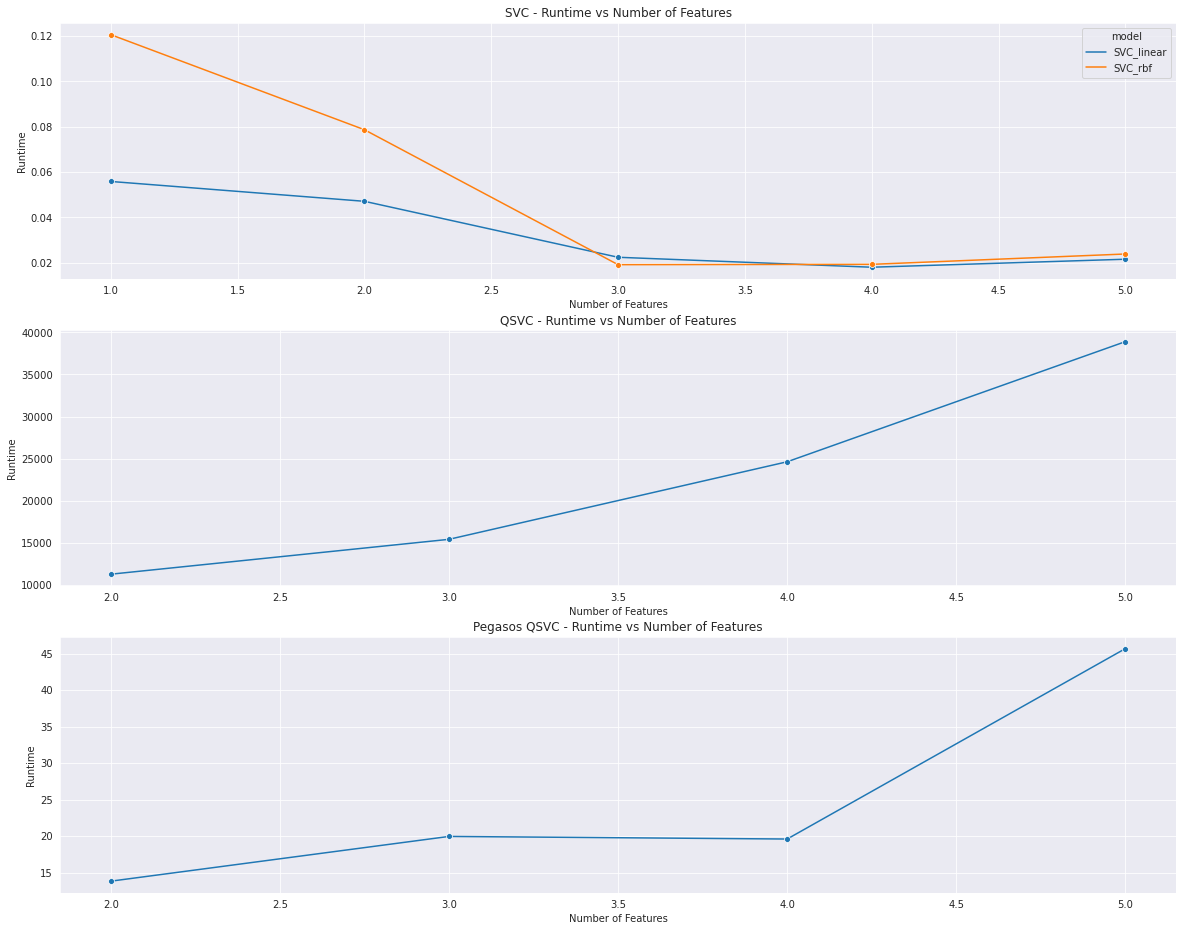

In [19]:
svc_chart_gen_features()

In [20]:
size_list = os.listdir("results/runtime_size/")
size_df = pd.DataFrame()
for data in size_list:
    if ".csv" in data:
        new_df = pd.read_csv("results/runtime_size/" + data)
        size_df = pd.concat([size_df, new_df], axis = 0).reset_index(drop=True)

In [21]:
size_df["data"] = "room"
size_df.to_csv("../data_for_paper/size_runtime_svc_room.csv", index=False)

In [22]:
def svc_chart_gen_size():
    svc = size_df[size_df["model"].isin(["SVC_linear", "SVC_rbf"])]
    qsvc = size_df[size_df["model"]=="QSVC"]
    pegasos_qsvc = size_df[size_df["model"] =="Pegasos QSVC"]
    
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (20, 16))
    sns.lineplot(x = "size", y = "runtime", data = svc, hue = "model", ax = axes[0], marker = "o")
    ax=axes[0]
    ax.set_title("SVC - Runtime vs Number of observations")
    ax.set_ylabel("Runtime", fontsize=10)
    ax.set_xlabel("Number of observations", fontsize=10)
    sns.lineplot(x = "size", y = "runtime", data = qsvc, ax = axes[1], marker="o")
    ax = axes[1]
    ax.set_title("QSVC - Runtime vs Number of observations")
    ax.set_ylabel("Runtime", fontsize=10)
    ax.set_xlabel("Number of observations", fontsize=10)
    sns.lineplot(x = "size", y = "runtime", data = pegasos_qsvc, ax = axes[2], marker="o")
    ax = axes[2]
    ax.set_title("Pegasos QSVC - Runtime vs Number of observations")
    ax.set_ylabel("Runtime", fontsize=10)
    ax.set_xlabel("Number of observations", fontsize=10)

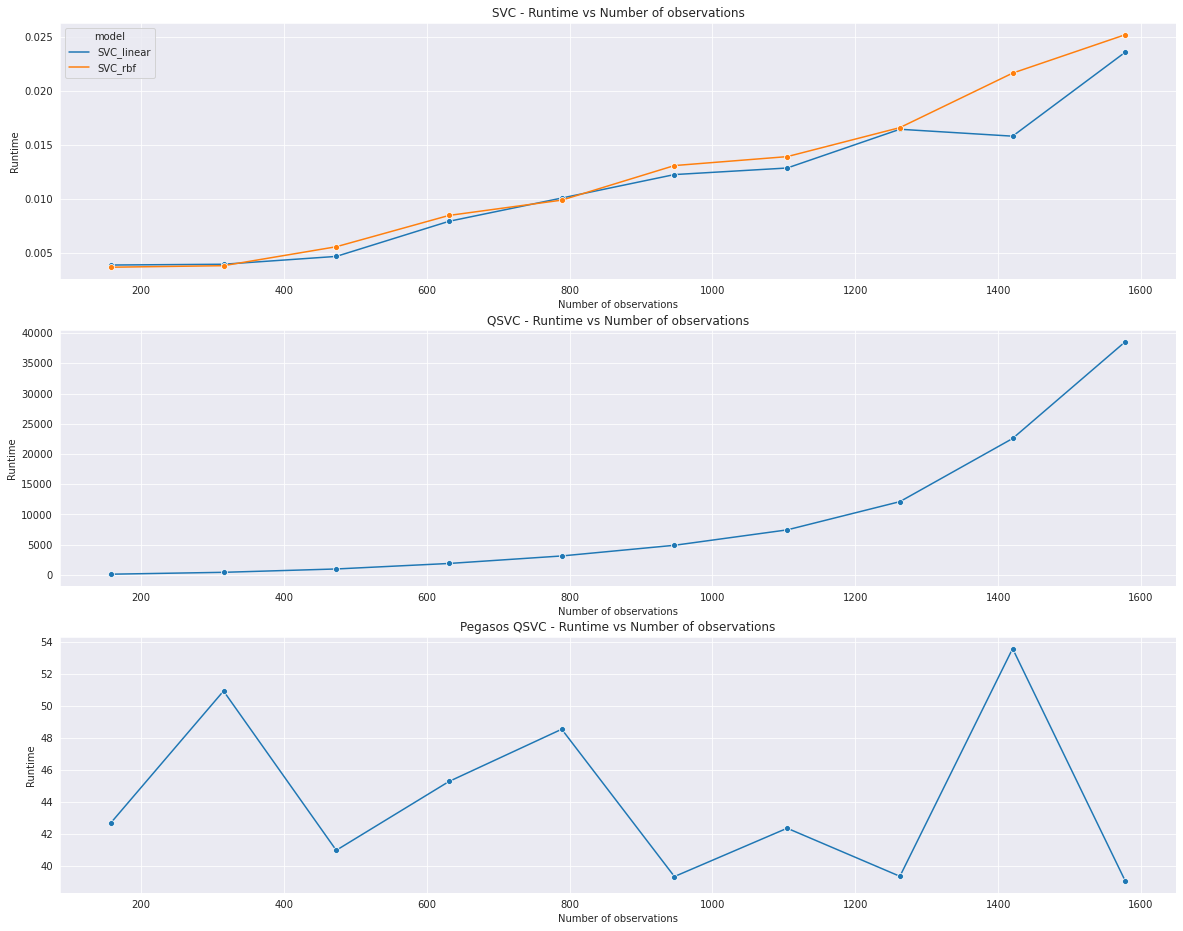

In [23]:
svc_chart_gen_size()

### VQC Report

In [24]:
vqc_feature_list = os.listdir("vqc_results/runtime_features/")
vqc_feature_df = pd.DataFrame()
for data in vqc_feature_list:
    if ".csv" in data:
        new_df = pd.read_csv("vqc_results/runtime_features/" + data)
        vqc_feature_df = pd.concat([vqc_feature_df, new_df], axis = 0).reset_index(drop=True)

In [25]:
vqc_feature_df["data"] = "room"
vqc_feature_df.to_csv("../data_for_paper/feature_runtime_vqc_room.csv", index=False)

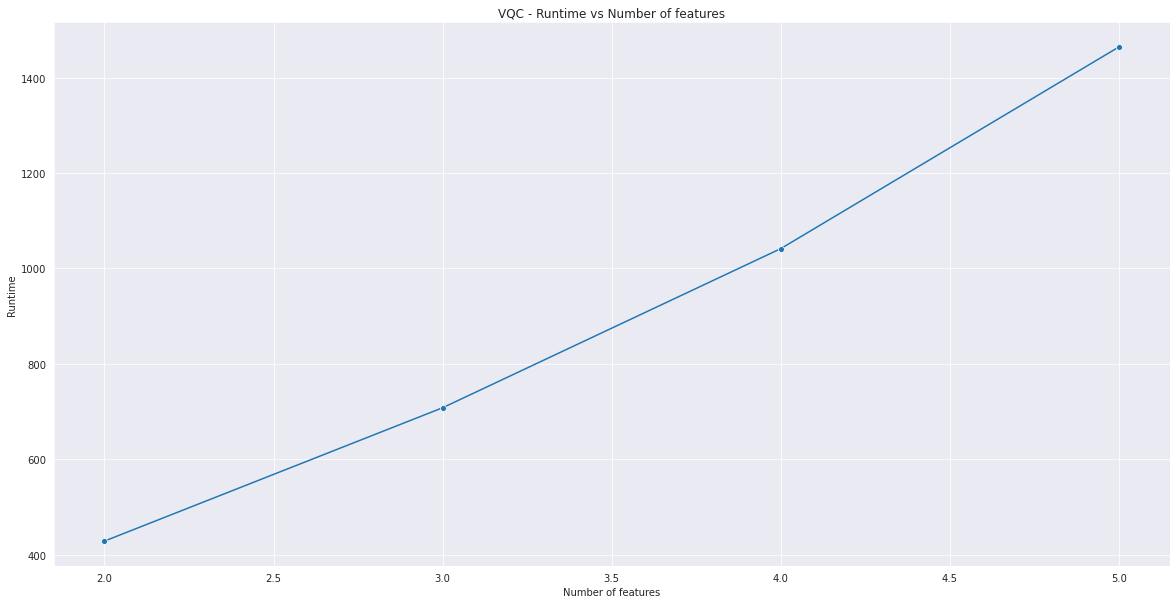

In [26]:
plt.figure(figsize=(20,10))
sns.lineplot(x = "num_features", y = "runtime", data = vqc_feature_df, marker = "o")
#ax = axes[1]
plt.title("VQC - Runtime vs Number of features")
plt.ylabel("Runtime", fontsize=10)
plt.xlabel("Number of features", fontsize=10)
plt.show();

In [27]:
vqc_size_list = os.listdir("vqc_results/runtime_size/")
vqc_size_df = pd.DataFrame()
for data in vqc_size_list:
    if ".csv" in data:
        new_df = pd.read_csv("vqc_results/runtime_size/" + data)
        vqc_size_df = pd.concat([vqc_size_df, new_df], axis = 0).reset_index(drop=True)

In [28]:
vqc_size_df["data"] = "room"
vqc_size_df.to_csv("../data_for_paper/size_runtime_vqc_room.csv", index=False)

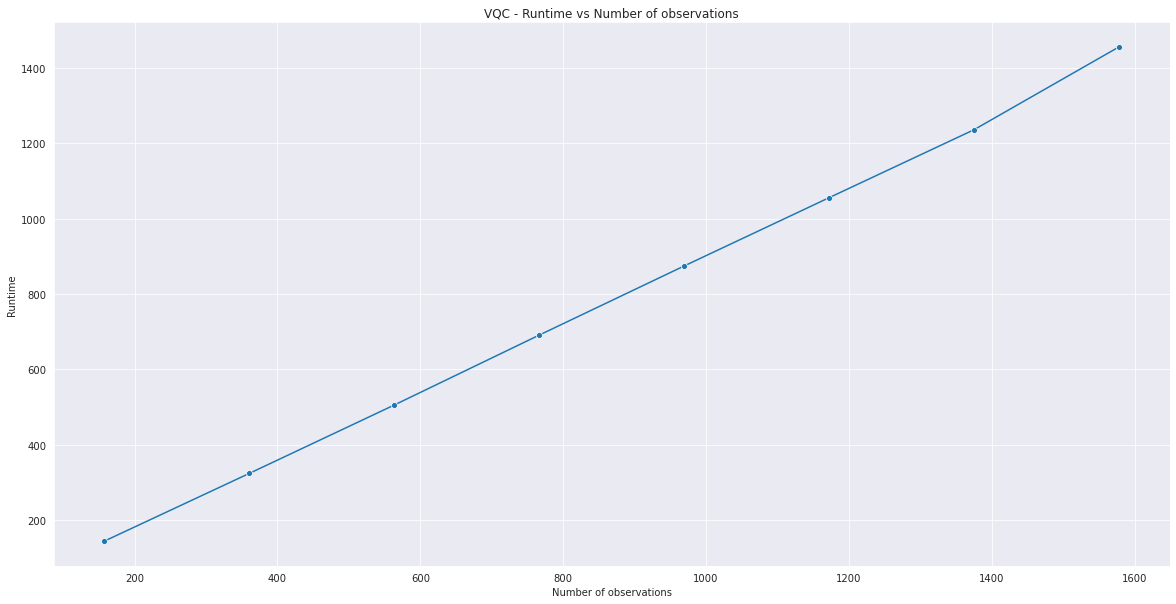

In [29]:
plt.figure(figsize=(20,10))
sns.lineplot(x = "size", y = "runtime", data = vqc_size_df, marker="o")
#ax = axes[1]
plt.title("VQC - Runtime vs Number of observations")
plt.ylabel("Runtime", fontsize=10)
plt.xlabel("Number of observations", fontsize=10)
plt.show();